<a href="https://colab.research.google.com/github/Dtyagi12/GUVI_tasks/blob/main/Copy_of_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#Social_Network_Ads.csv

**Importing the libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [73]:
data=pd.read_csv("/content/Social_Network_Ads (1).csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [74]:
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()
data["Gender"]=label_encode.fit_transform(data["Gender"])

In [75]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [76]:
from sklearn.model_selection import train_test_split

X = data[['Gender','Age','EstimatedSalary']].values
y = data['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [78]:
from sklearn.tree import DecisionTreeClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  print("Depth", depth, "ROC Train", roc_auc_score(y_train, dt.predict(X_train)), "ROC Test", roc_auc_score(y_test, y_pred) )

Depth 1 ROC Train 0.7804933759707628 ROC Test 0.9114420062695925
Depth 2 ROC Train 0.9141783296648531 ROC Test 0.9114420062695925
Depth 3 ROC Train 0.9166908924789235 ROC Test 0.9114420062695925
Depth 4 ROC Train 0.9186428007807634 ROC Test 0.9114420062695925
Depth 5 ROC Train 0.935171726400598 ROC Test 0.9114420062695925
Depth 6 ROC Train 0.9419826404751028 ROC Test 0.9114420062695925
Depth 7 ROC Train 0.9552722289131609 ROC Test 0.9114420062695925
Depth 8 ROC Train 0.9701814859421073 ROC Test 0.9114420062695925
Depth 9 ROC Train 0.9768262801611362 ROC Test 0.9114420062695925
Depth 10 ROC Train 0.9834710743801653 ROC Test 0.9114420062695925
Depth 20 ROC Train 1.0 ROC Test 0.9114420062695925


In [79]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

**Predicting the Test set results**

In [80]:
# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

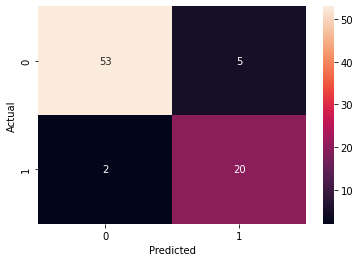

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

[Text(0.453125, 0.9666666666666667, 'X[1] <= 0.611\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.9, 'X[2] <= 0.596\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.1590909090909091, 0.8333333333333334, 'X[1] <= -0.167\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.13636363636363635, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.18181818181818182, 0.7666666666666667, 'X[2] <= 0.393\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.1590909090909091, 0.7, 'X[2] <= -0.07\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.13636363636363635, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.18181818181818182, 0.6333333333333333, 'X[2] <= 0.017\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.1590909090909091, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20454545454545456, 0.5666666666666667, 'X[1] <= 0.319\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 T

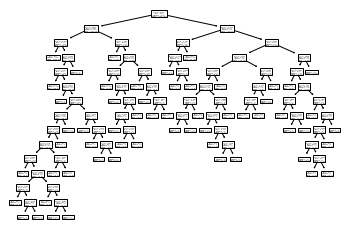

In [82]:
from sklearn import tree
tree.plot_tree(dt)

**Visualising the Test set results**

In [83]:
print('ROC score train', roc_auc_score(y_train, dt.predict(X_train)))

ROC score train 1.0


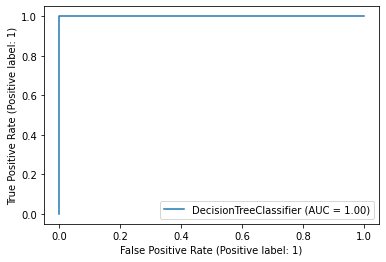

In [84]:
RocCurveDisplay.from_estimator(dt,X_train,y_train)

In [85]:
print('ROC test', roc_auc_score(y_test, y_pred))

ROC test 0.9114420062695925


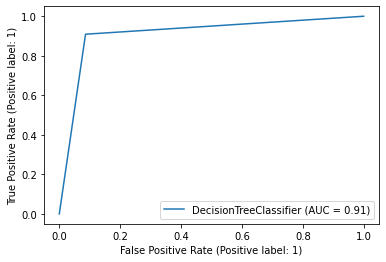

In [86]:
RocCurveDisplay.from_estimator(dt,X_test,y_test)

1. Decision Tree AUROC value for training data is 1.0.
2. Decision Tree AUROC value for training data is 0.91.
3. Max Depth for the decision tree is 20

Here is very good AUROC value of both Train and Test dataset.